In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

with_mask_path = "/content/drive/My Drive/Colab Notebooks/face-mask-detector/dataset/shared/with_mask"
without_mask_path = "/content/drive/My Drive/Colab Notebooks/face-mask-detector/dataset/shared/without_mask"

In [ ]:
IMG_SIZE = 100
training_data = []

for img in os.listdir(with_mask_path):
  try:
    img_array = cv2.imread(os.path.join(with_mask_path,img),cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    
    training_data.append([new_array, 0])
  except Exception as e:
    pass


In [ ]:
for img in os.listdir(without_mask_path):
    try:
      img_array = cv2.imread(os.path.join(without_mask_path,img),cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([new_array, 1])
    except Exception as e:
      pass 

In [ ]:
print(len(training_data))

3833


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for features, label in training_data:
  x_train.append(features)
  y_train.append(label)

In [ ]:
x_test = x_train[:333]
y_test = y_train[:333]
x_train = x_train[333:]
y_train = y_train[333:]

In [ ]:
print(len(x_train))
print(len(x_test))

3500
333


0


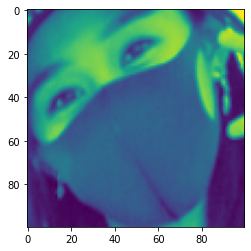

0


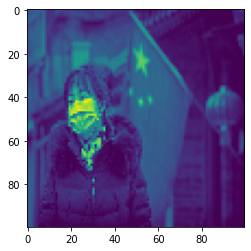

1


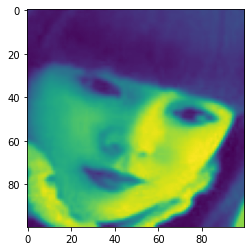

1


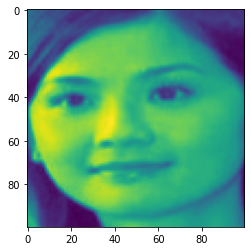

1


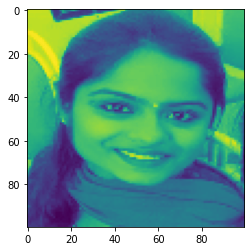

1


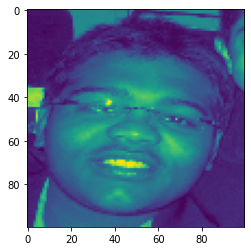

0


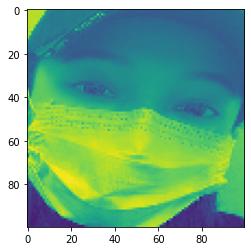

0


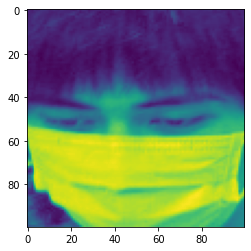

0


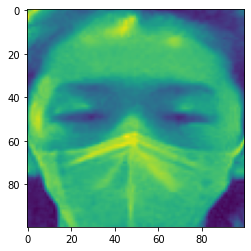

1


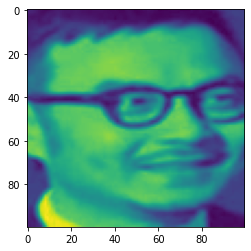

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

for i in range (0,10):
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [ ]:
import pickle
path = "/content/drive/My Drive/Colab Notebooks/face-mask-detector/"

pickle_out = open(path + "x1_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open(path + "y1_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open(path + "x1_test.pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open(path + "y1_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()